<a href="https://colab.research.google.com/github/RepoRecipee/IIIT-PROJECTS-AND-LABS/blob/main/AIML_III_Module_4_Lab_1_Perceptron_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Students Internship Batch of 2024
# Module 4: Perceptron and Gradient Descent
Lab 1: Perceptron
# In this lab, we will be studying the perceptron learning algorithm.

In [5]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [6]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [7]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [8]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

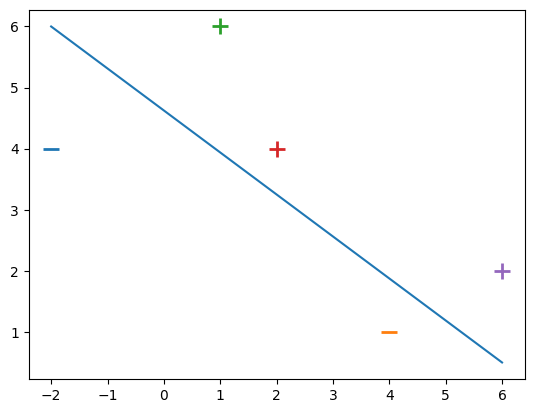

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

In [10]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [11]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

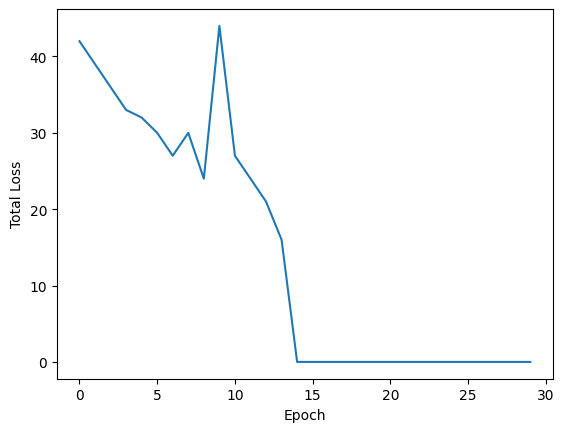

In [12]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

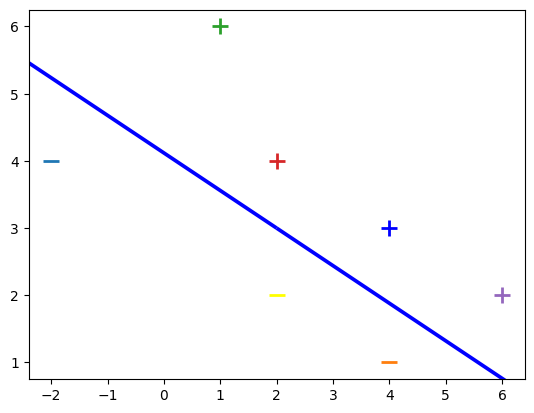

In [13]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try
# Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
## Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
# Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.

Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.

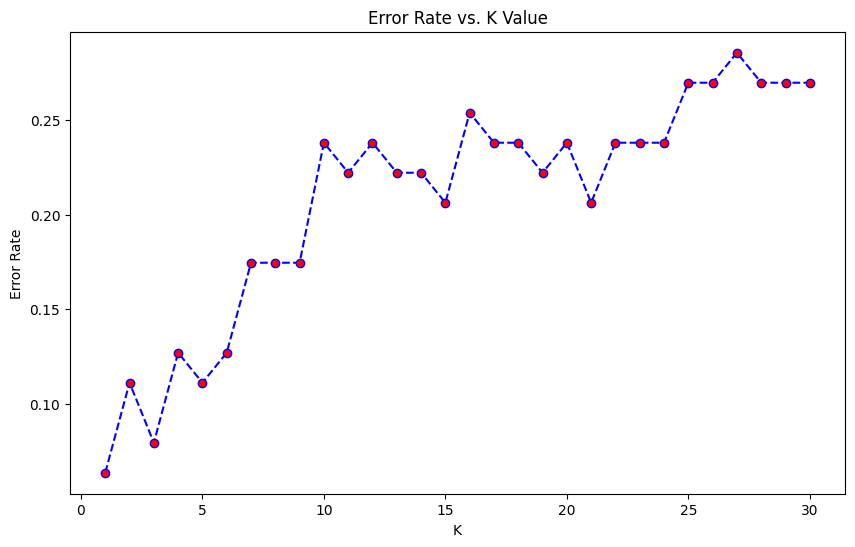

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Sonar dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
data = pd.read_csv(url, header=None)

# Separate features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize lists to store error rates
error_rates = []

# Train KNN models with different values of K and calculate the error rate
for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error_rate)

# Plot the error rates
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), error_rates, color='blue', linestyle='--', marker='o', markerfacecolor='red')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


# Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?

Convergence reached at iteration 100 with learning rate 0.1


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-15-1a69c950efe3>:24: RuntimeWarning: invalid value encountered in scalar subtract
  if iteration > 0 and abs(history[-2] - history[-1]) < tolerance:
<ipython-input-15-1a69c950efe3>:20: RuntimeWarning: overflow encountered in square
  cost = np.mean((X_b.dot(theta) - y) ** 2)  # Calculate the cost (MSE)
<ipython-input-15-1a69c950efe3>:19: RuntimeWarning: invalid value encountered in subtract
  theta = theta - learning_rate * gradients


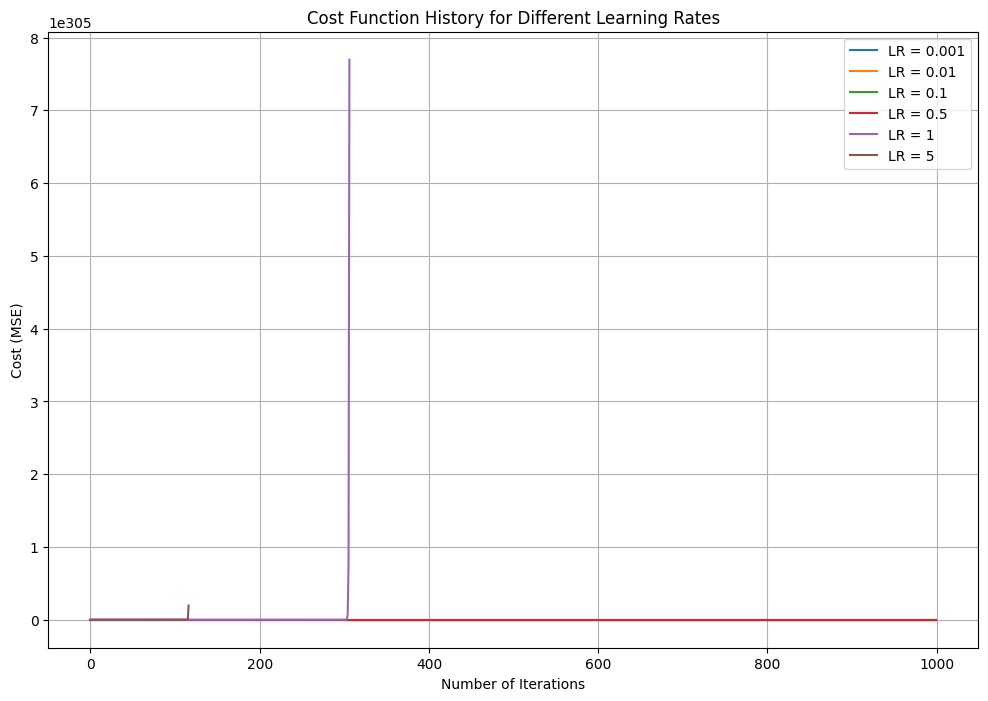

Number of iterations for each learning rate: [999, 999, 100, 999, 999, 999]


In [15]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic linear data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Implement gradient descent for linear regression
def gradient_descent(X, y, learning_rate, n_iterations=1000, tolerance=1e-6):
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]  # Add bias term (intercept)
    theta = np.random.randn(n + 1, 1)  # Random initialization of parameters
    history = []

    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients
        cost = np.mean((X_b.dot(theta) - y) ** 2)  # Calculate the cost (MSE)
        history.append(cost)

        # Check for convergence (if cost change is below the tolerance)
        if iteration > 0 and abs(history[-2] - history[-1]) < tolerance:
            print(f"Convergence reached at iteration {iteration} with learning rate {learning_rate}")
            break

    return theta, history, iteration

# Vary learning rates
learning_rates = [0.001, 0.01, 0.1, 0.5, 1, 5]
histories = []
iterations = []

for lr in learning_rates:
    _, history, iters = gradient_descent(X, y, learning_rate=lr)
    histories.append(history)
    iterations.append(iters)

# Plot the cost function history for different learning rates
plt.figure(figsize=(12, 8))
for i, lr in enumerate(learning_rates):
    plt.plot(range(len(histories[i])), histories[i], label=f'LR = {lr}')

plt.title("Cost Function History for Different Learning Rates")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost (MSE)")
plt.legend()
plt.grid(True)
plt.show()

# Output the number of iterations for each learning rate
print(f"Number of iterations for each learning rate: {iterations}")


# Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.

Predicted labels: [0 0 0 0]
Actual labels: [0 1 1 0]
Perceptron model coefficients: [[0. 0.]]
Perceptron model intercept: [0.]


<ipython-input-16-4a8d38a0d19c>:32: RuntimeWarning: invalid value encountered in divide
  y_values = -(perceptron.coef_[0][0] * x_values + perceptron.intercept_[0]) / perceptron.coef_[0][1]


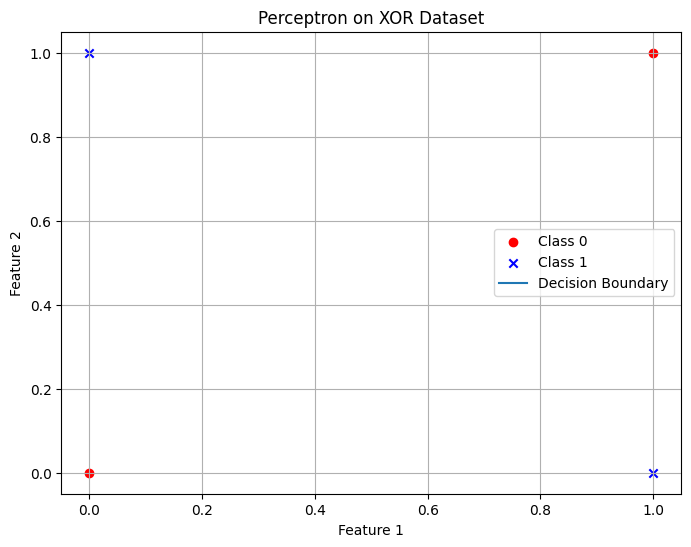

In [16]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

# Create a toy XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])  # XOR labels

# Initialize the Perceptron model
perceptron = Perceptron(max_iter=1000, tol=1e-3)

# Fit the Perceptron model on the XOR dataset
perceptron.fit(X, y)

# Predict the labels
y_pred = perceptron.predict(X)

# Print the predictions and compare with actual labels
print(f"Predicted labels: {y_pred}")
print(f"Actual labels: {y}")
print(f"Perceptron model coefficients: {perceptron.coef_}")
print(f"Perceptron model intercept: {perceptron.intercept_}")

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='x', label='Class 1')

# Plot decision boundary
x_values = np.linspace(0, 1, 100)
y_values = -(perceptron.coef_[0][0] * x_values + perceptron.intercept_[0]) / perceptron.coef_[0][1]
plt.plot(x_values, y_values, label='Decision Boundary')

plt.title("Perceptron on XOR Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [17]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [18]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


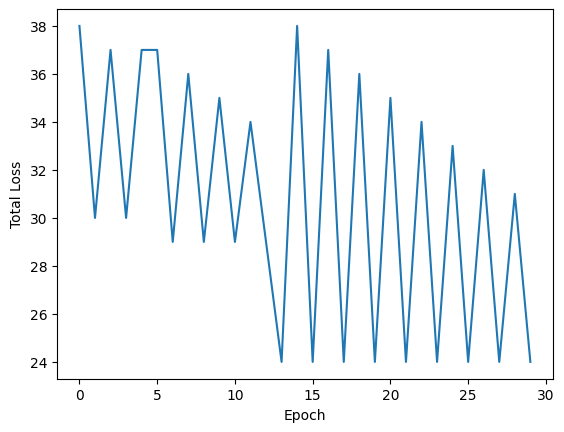

In [19]:
print(perceptron_algo_plot(X, y))

# Additional Critical Thinking Questions

Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

Predicted labels: [-1 -1 -1  1]
Actual labels: [-1 -1 -1  1]
Perceptron model coefficients: [[2. 2.]]
Perceptron model intercept: [-2.]


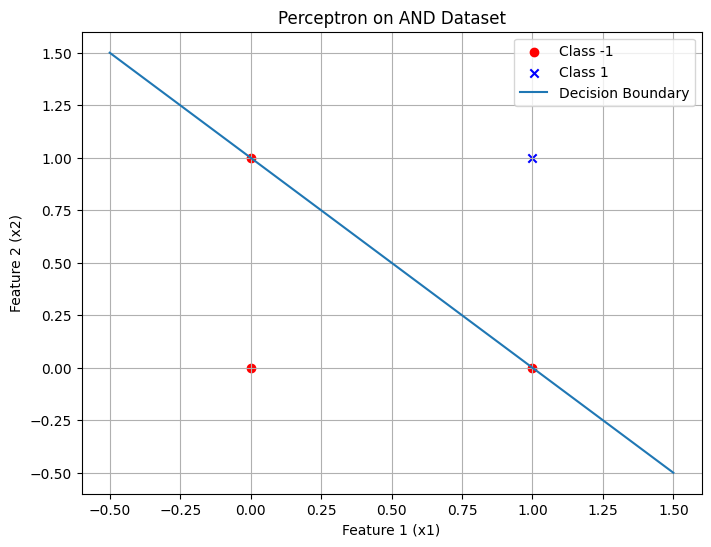

In [20]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

# Create the dataset for the Boolean "AND" function
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([-1, -1, -1, 1])  # AND function labels: -1 for false, 1 for true

# Initialize the Perceptron model
perceptron = Perceptron(max_iter=1000, tol=1e-3)

# Fit the Perceptron model on the AND dataset
perceptron.fit(X, y)

# Predict the labels
y_pred = perceptron.predict(X)

# Print the predictions and compare with actual labels
print(f"Predicted labels: {y_pred}")
print(f"Actual labels: {y}")
print(f"Perceptron model coefficients: {perceptron.coef_}")
print(f"Perceptron model intercept: {perceptron.intercept_}")

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', marker='o', label='Class -1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='x', label='Class 1')

# Plot decision boundary
x_values = np.linspace(-0.5, 1.5, 100)
y_values = -(perceptron.coef_[0][0] * x_values + perceptron.intercept_[0]) / perceptron.coef_[0][1]
plt.plot(x_values, y_values, label='Decision Boundary')

plt.title("Perceptron on AND Dataset")
plt.xlabel("Feature 1 (x1)")
plt.ylabel("Feature 2 (x2)")
plt.legend()
plt.grid(True)
plt.show()


# Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

#  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.

In [21]:
import numpy as np

class Perceptron:
    def __init__(self, input_dim, learning_rate=0.01, epochs=1000):
        self.weights = np.zeros(input_dim)
        self.bias = 0
        self.learning_rate = learning_rate
        self.epochs = epochs

    def _predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, -1)

    def fit(self, X, y):
        for epoch in range(self.epochs):
            for i in range(len(X)):
                prediction = self._predict(X[i].reshape(1, -1))
                if prediction != y[i]:
                    # Update weights and bias
                    self.weights += self.learning_rate * (y[i] - prediction) * X[i]
                    self.bias += self.learning_rate * (y[i] - prediction)

    def predict(self, X):
        return self._predict(X)

# Example usage:
if __name__ == "__main__":
    # Sample data (X: features, y: labels)
    X = np.array([
        [2, 3],
        [1, 1],
        [3, 1],
        [2, 2],
        [4, 5]
    ])
    y = np.array([1, -1, -1, 1, 1])  # Corresponding labels

    # Initialize Perceptron
    perceptron = Perceptron(input_dim=X.shape[1])

    # Train the Perceptron
    perceptron.fit(X, y)

    # Make predictions
    predictions = perceptron.predict(X)
    print("Predictions:", predictions)
    print("Actual labels:", y)


Predictions: [ 1 -1 -1  1  1]
Actual labels: [ 1 -1 -1  1  1]


Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.


In [23]:
import numpy as np
from itertools import product

def generate_truth_table(func):
    """Generate truth table for a given boolean function."""
    table = []
    for x1, x2 in product([0, 1], repeat=2):
        table.append((x1, x2, func(x1, x2)))
    return table

def is_linearly_separable(X, y):
    """Check if a boolean function is linearly separable using a Perceptron."""
    from sklearn.linear_model import Perceptron
    clf = Perceptron()
    # Check if there are at least two classes in the target
    if len(np.unique(y)) < 2:
        return False
    clf.fit(X, y)
    # If all points are correctly classified by the Perceptron, it is linearly separable
    return np.all(clf.predict(X) == y)

# Define all 16 possible boolean functions for 2-bit input
boolean_functions = {
    'Always 0': lambda x1, x2: 0,
    'Always 1': lambda x1, x2: 1,
    'x1': lambda x1, x2: x1,
    'x2': lambda x1, x2: x2,
    'NOT x1': lambda x1, x2: 1 - x1,
    'NOT x2': lambda x1, x2: 1 - x2,
    'x1 AND x2': lambda x1, x2: x1 & x2,
    'x1 OR x2': lambda x1, x2: x1 | x2,
    'x1 XOR x2': lambda x1, x2: x1 ^ x2,
    'x1 NAND x2': lambda x1, x2: 1 - (x1 & x2),
    'x1 NOR x2': lambda x1, x2: 1 - (x1 | x2),
    'x1 XNOR x2': lambda x1, x2: 1 - (x1 ^ x2),
    'x1 AND (NOT x2)': lambda x1, x2: x1 & (1 - x2),
    'x2 AND (NOT x1)': lambda x1, x2: x2 & (1 - x1),
    '(x1 OR x2) AND (NOT x1)': lambda x1, x2: (x1 | x2) & (1 - x1),
    '(x1 OR x2) AND (NOT x2)': lambda x1, x2: (x1 | x2) & (1 - x2),
}

# Generate all possible inputs
inputs = np.array(list(product([0, 1], repeat=2)))

# Check which functions are learnable
for name, func in boolean_functions.items():
    outputs = np.array([func(x1, x2) for x1, x2 in inputs])
    if is_linearly_separable(inputs, outputs):
        print(f"{name} is learnable by Perceptron.")
    else:
        print(f"{name} is NOT learnable by Perceptron.")
        # Print the truth table for non-learnable functions
        truth_table = generate_truth_table(func)
        print(f"Truth Table for {name}:")
        for row in truth_table:
            print(f"x1={row[0]}, x2={row[1]} -> Output={row[2]}")
        print()

Always 0 is NOT learnable by Perceptron.
Truth Table for Always 0:
x1=0, x2=0 -> Output=0
x1=0, x2=1 -> Output=0
x1=1, x2=0 -> Output=0
x1=1, x2=1 -> Output=0

Always 1 is NOT learnable by Perceptron.
Truth Table for Always 1:
x1=0, x2=0 -> Output=1
x1=0, x2=1 -> Output=1
x1=1, x2=0 -> Output=1
x1=1, x2=1 -> Output=1

x1 is learnable by Perceptron.
x2 is learnable by Perceptron.
NOT x1 is learnable by Perceptron.
NOT x2 is learnable by Perceptron.
x1 AND x2 is learnable by Perceptron.
x1 OR x2 is learnable by Perceptron.
x1 XOR x2 is NOT learnable by Perceptron.
Truth Table for x1 XOR x2:
x1=0, x2=0 -> Output=0
x1=0, x2=1 -> Output=1
x1=1, x2=0 -> Output=1
x1=1, x2=1 -> Output=0

x1 NAND x2 is NOT learnable by Perceptron.
Truth Table for x1 NAND x2:
x1=0, x2=0 -> Output=1
x1=0, x2=1 -> Output=1
x1=1, x2=0 -> Output=1
x1=1, x2=1 -> Output=0

x1 NOR x2 is learnable by Perceptron.
x1 XNOR x2 is NOT learnable by Perceptron.
Truth Table for x1 XNOR x2:
x1=0, x2=0 -> Output=1
x1=0, x2=1 -> O